In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import umap
import sys




import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('data/removed_outlier.csv').set_index('id')
df

,loan_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,term_months
id,,,,,,,,,,,,,,,,,,,,,
68407277,3600.0,3600.0,13.99,123.03,20.0,24.0,10.0,3.0,55000.0,0.0,...,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,36.0
68355089,24700.0,24700.0,11.99,820.28,20.0,21.0,10.0,3.0,65000.0,0.0,...,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,36.0
68476807,10400.0,10400.0,22.45,289.91,50.0,51.0,3.0,3.0,104433.0,2.0,...,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,60.0
68426831,11950.0,11950.0,13.44,405.18,20.0,23.0,4.0,4.0,34000.0,2.0,...,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,36.0
68476668,20000.0,20000.0,9.17,637.58,10.0,12.0,10.0,3.0,180000.0,0.0,...,2.0,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89905081,18000.0,18000.0,9.49,377.95,10.0,12.0,5.0,5.0,130000.0,0.0,...,0.0,100.0,33.3,0.0,0.0,275356.0,54349.0,13100.0,77756.0,60.0
88948836,29400.0,29400.0,13.99,683.94,20.0,23.0,9.0,3.0,180792.0,0.0,...,2.0,100.0,42.9,0.0,0.0,719056.0,148305.0,56500.0,95702.0,60.0
89996426,32000.0,32000.0,14.49,752.74,20.0,24.0,3.0,3.0,157000.0,2.0,...,2.0,100.0,0.0,0.0,0.0,524379.0,122872.0,15800.0,23879.0,60.0


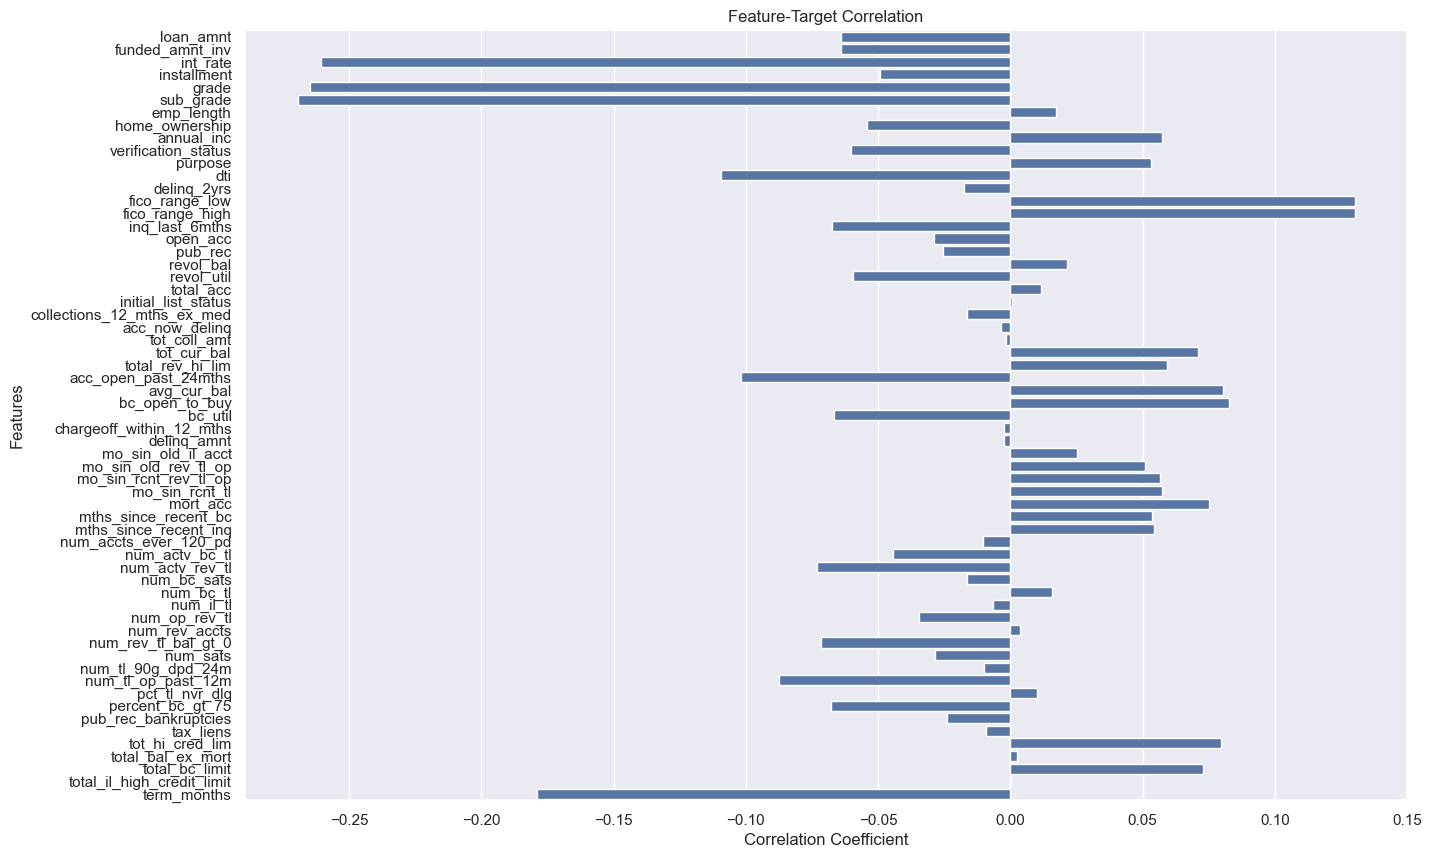

In [2]:
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

sns.set(style="darkgrid")

# Create a correlation matrix between features and target
corr_matrix = np.corrcoef(np.column_stack((X, y)), rowvar=False)

# Extract the correlation of features with the target variable
target_corr = corr_matrix[:-1, -1]

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a bar plot for feature-target correlation
sns.barplot(x=target_corr, y=X.columns)

# Set the title and labels
plt.title('Feature-Target Correlation')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Show the plot
plt.show()


In [3]:
#Feature importance scores using XGBoost

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
model = XGBClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Get feature importance scores
feature_importance = model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Get the top 40 features
top20 = feature_importance_df.head(20)

# Display or use the top features as needed
top20

,Feature,Importance
5,sub_grade,0.388997
4,grade,0.164122
60,term_months,0.054484
7,home_ownership,0.022303
27,acc_open_past_24mths,0.017928
28,avg_cur_bal,0.017221
37,mort_acc,0.015507
9,verification_status,0.014596
11,dti,0.012880
42,num_actv_rev_tl,0.012030


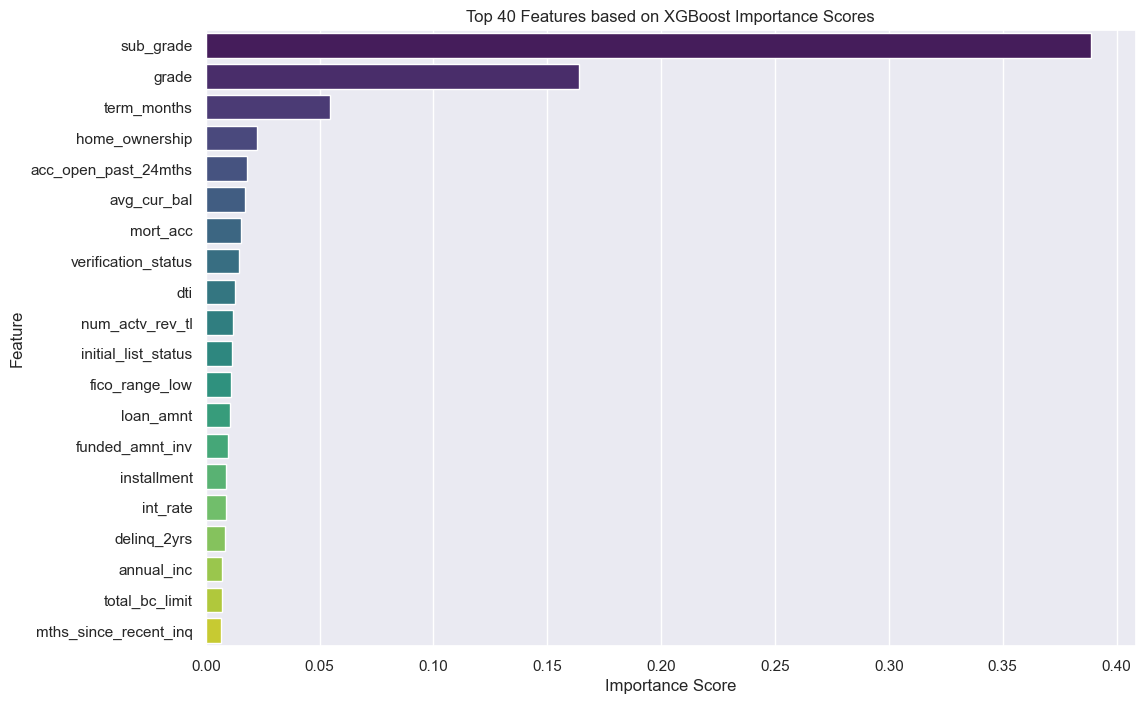

In [4]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top20, palette='viridis')
plt.xlabel('Importance Score')
plt.title('Top 40 Features based on XGBoost Importance Scores')
plt.show()

In [5]:
updated_X = X[top20['Feature']]

- Train Accuracy: 0.9689078121537682
- Train Precision: 0.9641488782766612
- Train Recall: 0.9982109666604204
- Train F1 Score: 0.9808843024098507

- Test Accuracy: 0.777315039663267
- Test Precision: 0.818616136853569
- Test Recall: 0.9262243542285732
- Test F1 Score: 0.8691020257651635


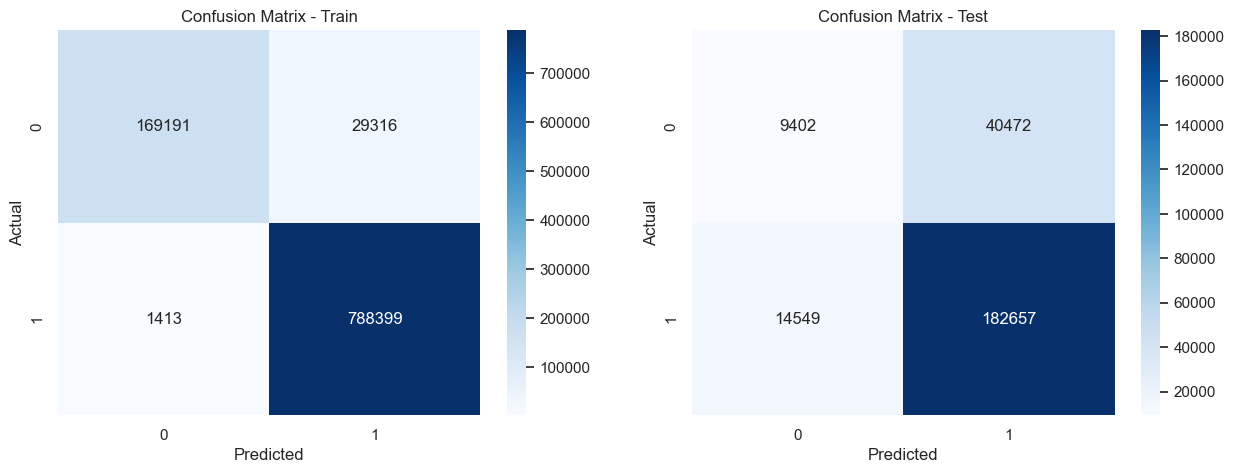

<Figure size 800x600 with 0 Axes>

In [6]:
from sklearn.metrics import classification_report



def get_scores(model, X_train,y_train, X_test, y_test, save):
    # Make predictions on the training set
    sns.set(style="darkgrid")

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))  # 1 row, 2 columns

    y_pred = model.predict(X_train)

    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)

    print("- Train Accuracy:", accuracy)
    print("- Train Precision:", precision)
    print("- Train Recall:", recall)
    print("- Train F1 Score:", f1)
    
    #print(classification_report(y, y_pred))

    # Calculate confusion matrix
    cm1 = confusion_matrix(y_train, y_pred)

    # Plot the confusion matrix
    sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax = axes[0])
    axes[0].set_title("Confusion Matrix - Train")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")
    
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("\n- Test Accuracy:", accuracy)
    print("- Test Precision:", precision)
    print("- Test Recall:", recall)
    print("- Test F1 Score:", f1)
    
    #print(classification_report(y, y_pred))

    # Calculate confusion matrix
    cm2 = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", ax = axes[1])
    axes[1].set_title("Confusion Matrix - Test")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")
    
    #plt.savefig(save)
    plt.show()
    


X_train, X_test, y_train, y_test = train_test_split(updated_X, y, test_size=0.2, random_state=42)

clf = XGBClassifier(n_estimators=1000, max_depth = 9, random_state = 42, objective='binary:logistic', learning_rate = 0.5)

#Model training
clf.fit(X_train, y_train)

get_scores(clf, X_train, y_train, X_test, y_test,'')



In [ ]:
reducer = umap.UMAP(n_neighbors = 5, n_components = 2, metric = 'euclidean', min_dist = 0.05, spread = 1.0, random_state=42)

projected_data = reducer.fit_transform(updated_X)

red1 = pd.DataFrame(data=projected_data, columns=['umap_1','umap_2'])
display(red1)

plt.scatter(red1['umap_1'],red1['umap_2'], alpha = 0.3)
plt.title('UMAP 2-components')
plt.xlabel('umap_1')
plt.ylabel('umap_2')
#plt.savefig('figs/umap_2_component.png')
plt.show()


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [ ]:
#['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']